# Red neuronal convolucional (CNN) para clasificación de imágenes.

# Cargar data

170498071/170498071 [==============================] - 3s 0us/step


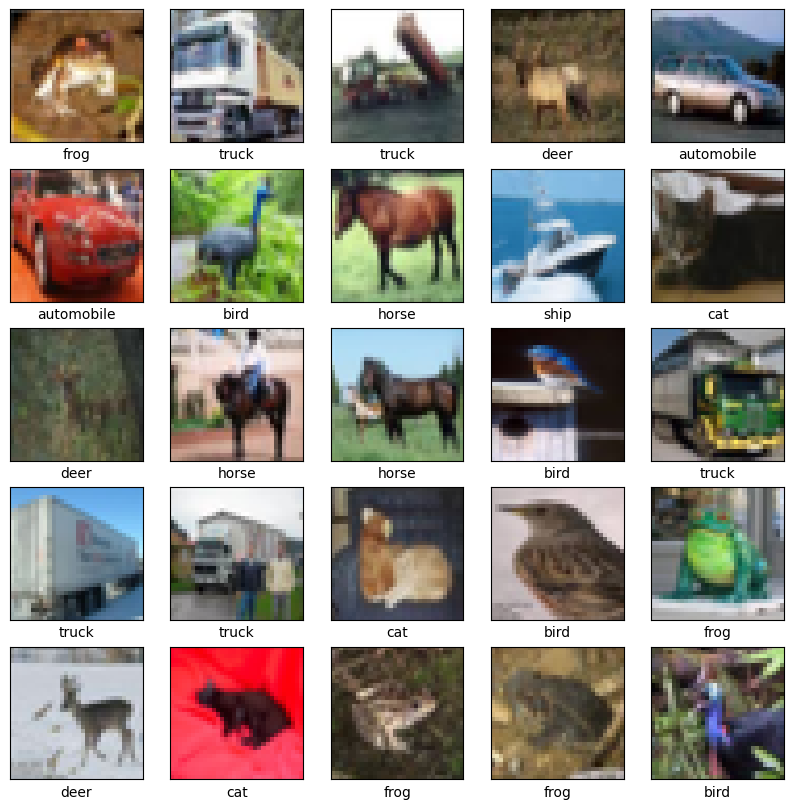

In [1]:
# Importar librerías necesarias
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


# Construir y entrenar el modelo CNN

In [5]:
from tensorflow.keras import datasets, layers, models, regularizers, callbacks
import tensorflow as tf

# Construir el modelo CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

# Mostrar la arquitectura del modelo
model.summary()

# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Callbacks para el entrenamiento
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',     # Monitorea la pérdida de validación
    patience=5,             # Número de épocas sin mejora para detener el entrenamiento
    restore_best_weights=True   # Restaura los pesos del mejor modelo al final
)

model_checkpoint = callbacks.ModelCheckpoint(
    'best_model.h5',        # Ruta donde se guardará el mejor modelo
    monitor='val_loss',     # Monitorea la pérdida de validación
    save_best_only=True,    # Guarda solo el mejor modelo
    mode='min'              # Modo 'min' para la métrica de pérdida
)

# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=15,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, model_checkpoint])

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Precisión en el conjunto de prueba: {test_acc}")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1563/1563 [==============================] - 9s 6ms/step - loss: 1.1685 - accuracy: 0.5950 - val_loss: 1.1025 - val_accuracy: 0.6237
Epoch 3/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0215 - accuracy: 0.6509 - val_loss: 1.0064 - val_accuracy: 0.6577
Epoch 4/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9227 - accuracy: 0.6922 - val_loss: 0.9733 - val_accuracy: 0.6759
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8641 - accuracy: 0.7149 - val_loss: 0.9622 - val_accuracy: 0.6814
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8172 - accuracy: 0.7328 - val_loss: 0.9216 - val_accuracy: 0.7035
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7729 - accuracy: 0.7504 - val_loss: 0.9701 - val_accuracy: 0.6915
Epoch 8/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7398 - accuracy: 0.7648 - val_loss: 0.9098 - val_accuracy: 0.7132
Ep

# Graficar la precisión y pérdida durante el entrenamiento

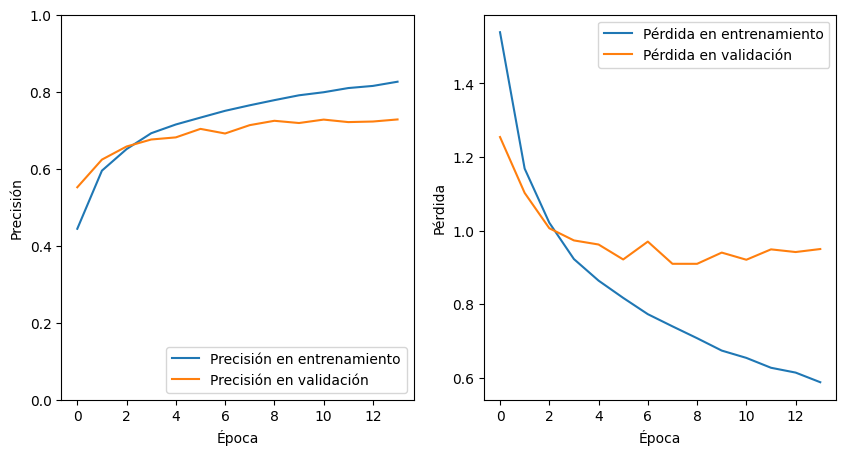

In [6]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label = 'Precisión en validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label = 'Pérdida en validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
#plt.ylim([0, 1.5])
plt.legend(loc='upper right')
plt.show()

# Predicciones

313/313 [==============================] - 1s 2ms/step


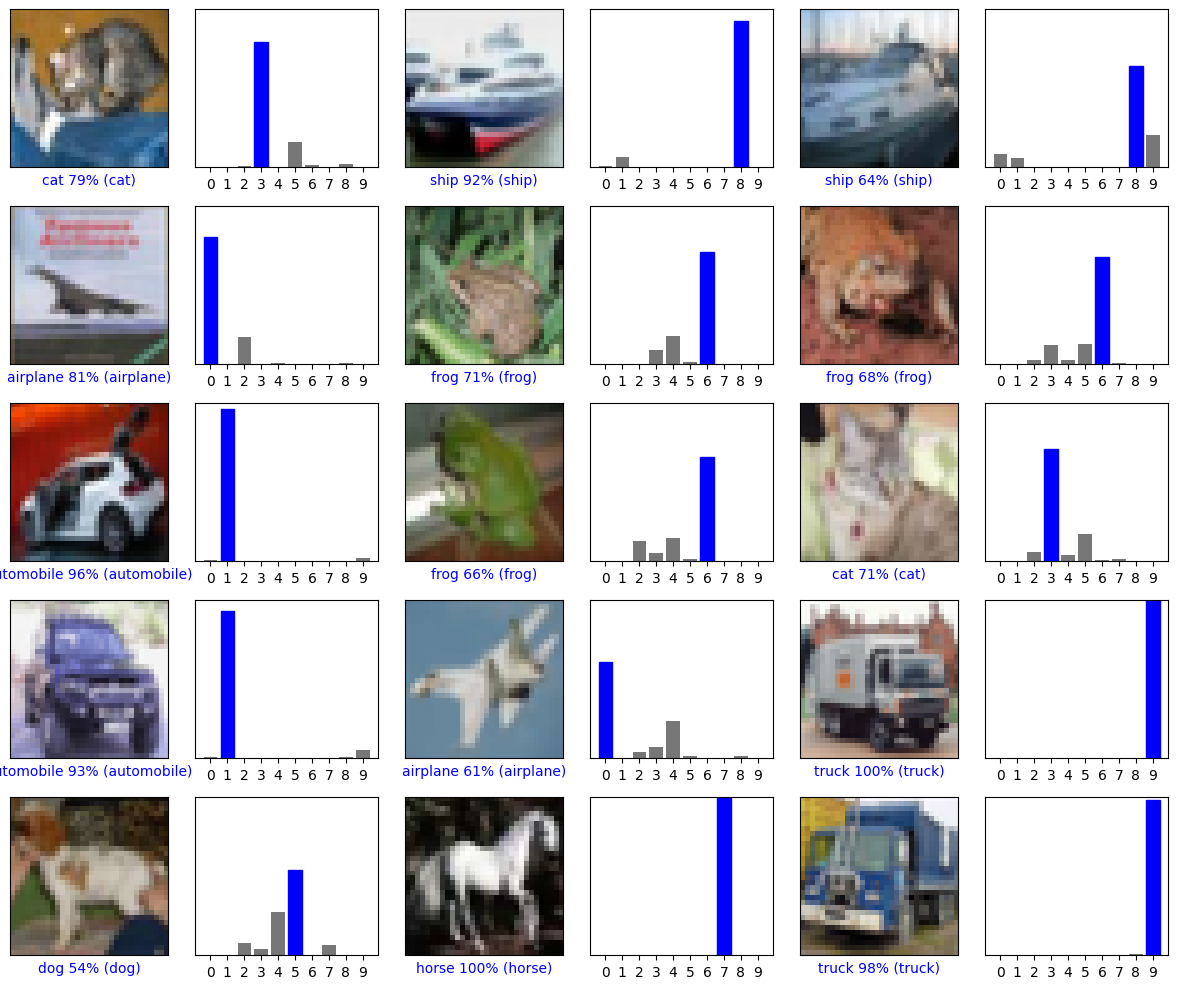

In [7]:
import numpy as np

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i][0], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i][0]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

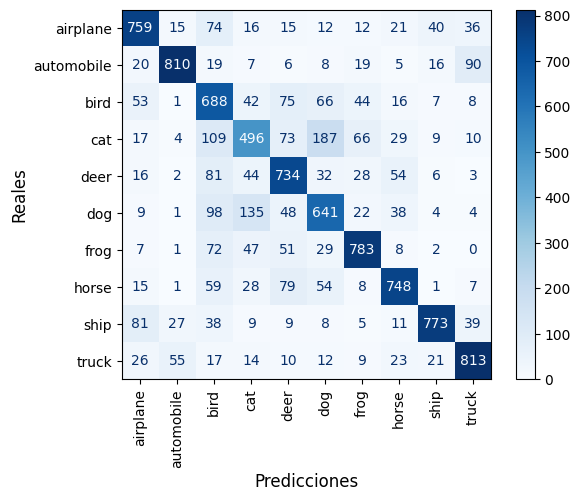

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm2 = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.xlabel('Predicciones', fontsize = 12)
plt.ylabel('Reales', fontsize = 12)
plt.show()